In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

In [3]:
import gensim
import os

Download data from here: https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books


In [8]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename), encoding='mac-roman')
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [9]:
story[0]

['george',
 'martin',
 'dance',
 'with',
 'dragons',
 'book',
 'five',
 'of',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'dedication',
 'this',
 'one',
 'is',
 'for',
 'my',
 'fans',
 'for',
 'lodey',
 'trebla',
 'stego',
 'pod',
 'caress',
 'yags',
 'ray',
 'and',
 'mr',
 'kate',
 'chataya',
 'mormont',
 'mich',
 'jamie',
 'vanessa',
 'ro',
 'for',
 'stubby',
 'louise',
 'agravaine',
 'wert',
 'malt',
 'jo',
 'mouse',
 'telisiane',
 'blackfyre',
 'bronn',
 'stone',
 'coyoteís',
 'daughter',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'madmen',
 'and',
 'wild',
 'women',
 'of',
 'the',
 'brotherhood',
 'without',
 'banners',
 'for',
 'my',
 'website',
 'wizards',
 'elio',
 'and',
 'linda',
 'lords',
 'of',
 'westeros',
 'winter',
 'and',
 'fabio',
 'of',
 'wic',
 'and',
 'gibbs',
 'of',
 'dragonstone',
 'who',
 'started',
 'it',
 'all',
 'for',
 'men',
 'and',
 'women',
 'of',
 'asshai',
 'in',
 'spain',
 'who',
 'sang',
 'to',
 'us',
 'of',
 'bear',
 'and',
 'maiden',
 'fair',
 'and',
 't

In [10]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [11]:
model.build_vocab(story)

In [12]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6615014, 8638695)

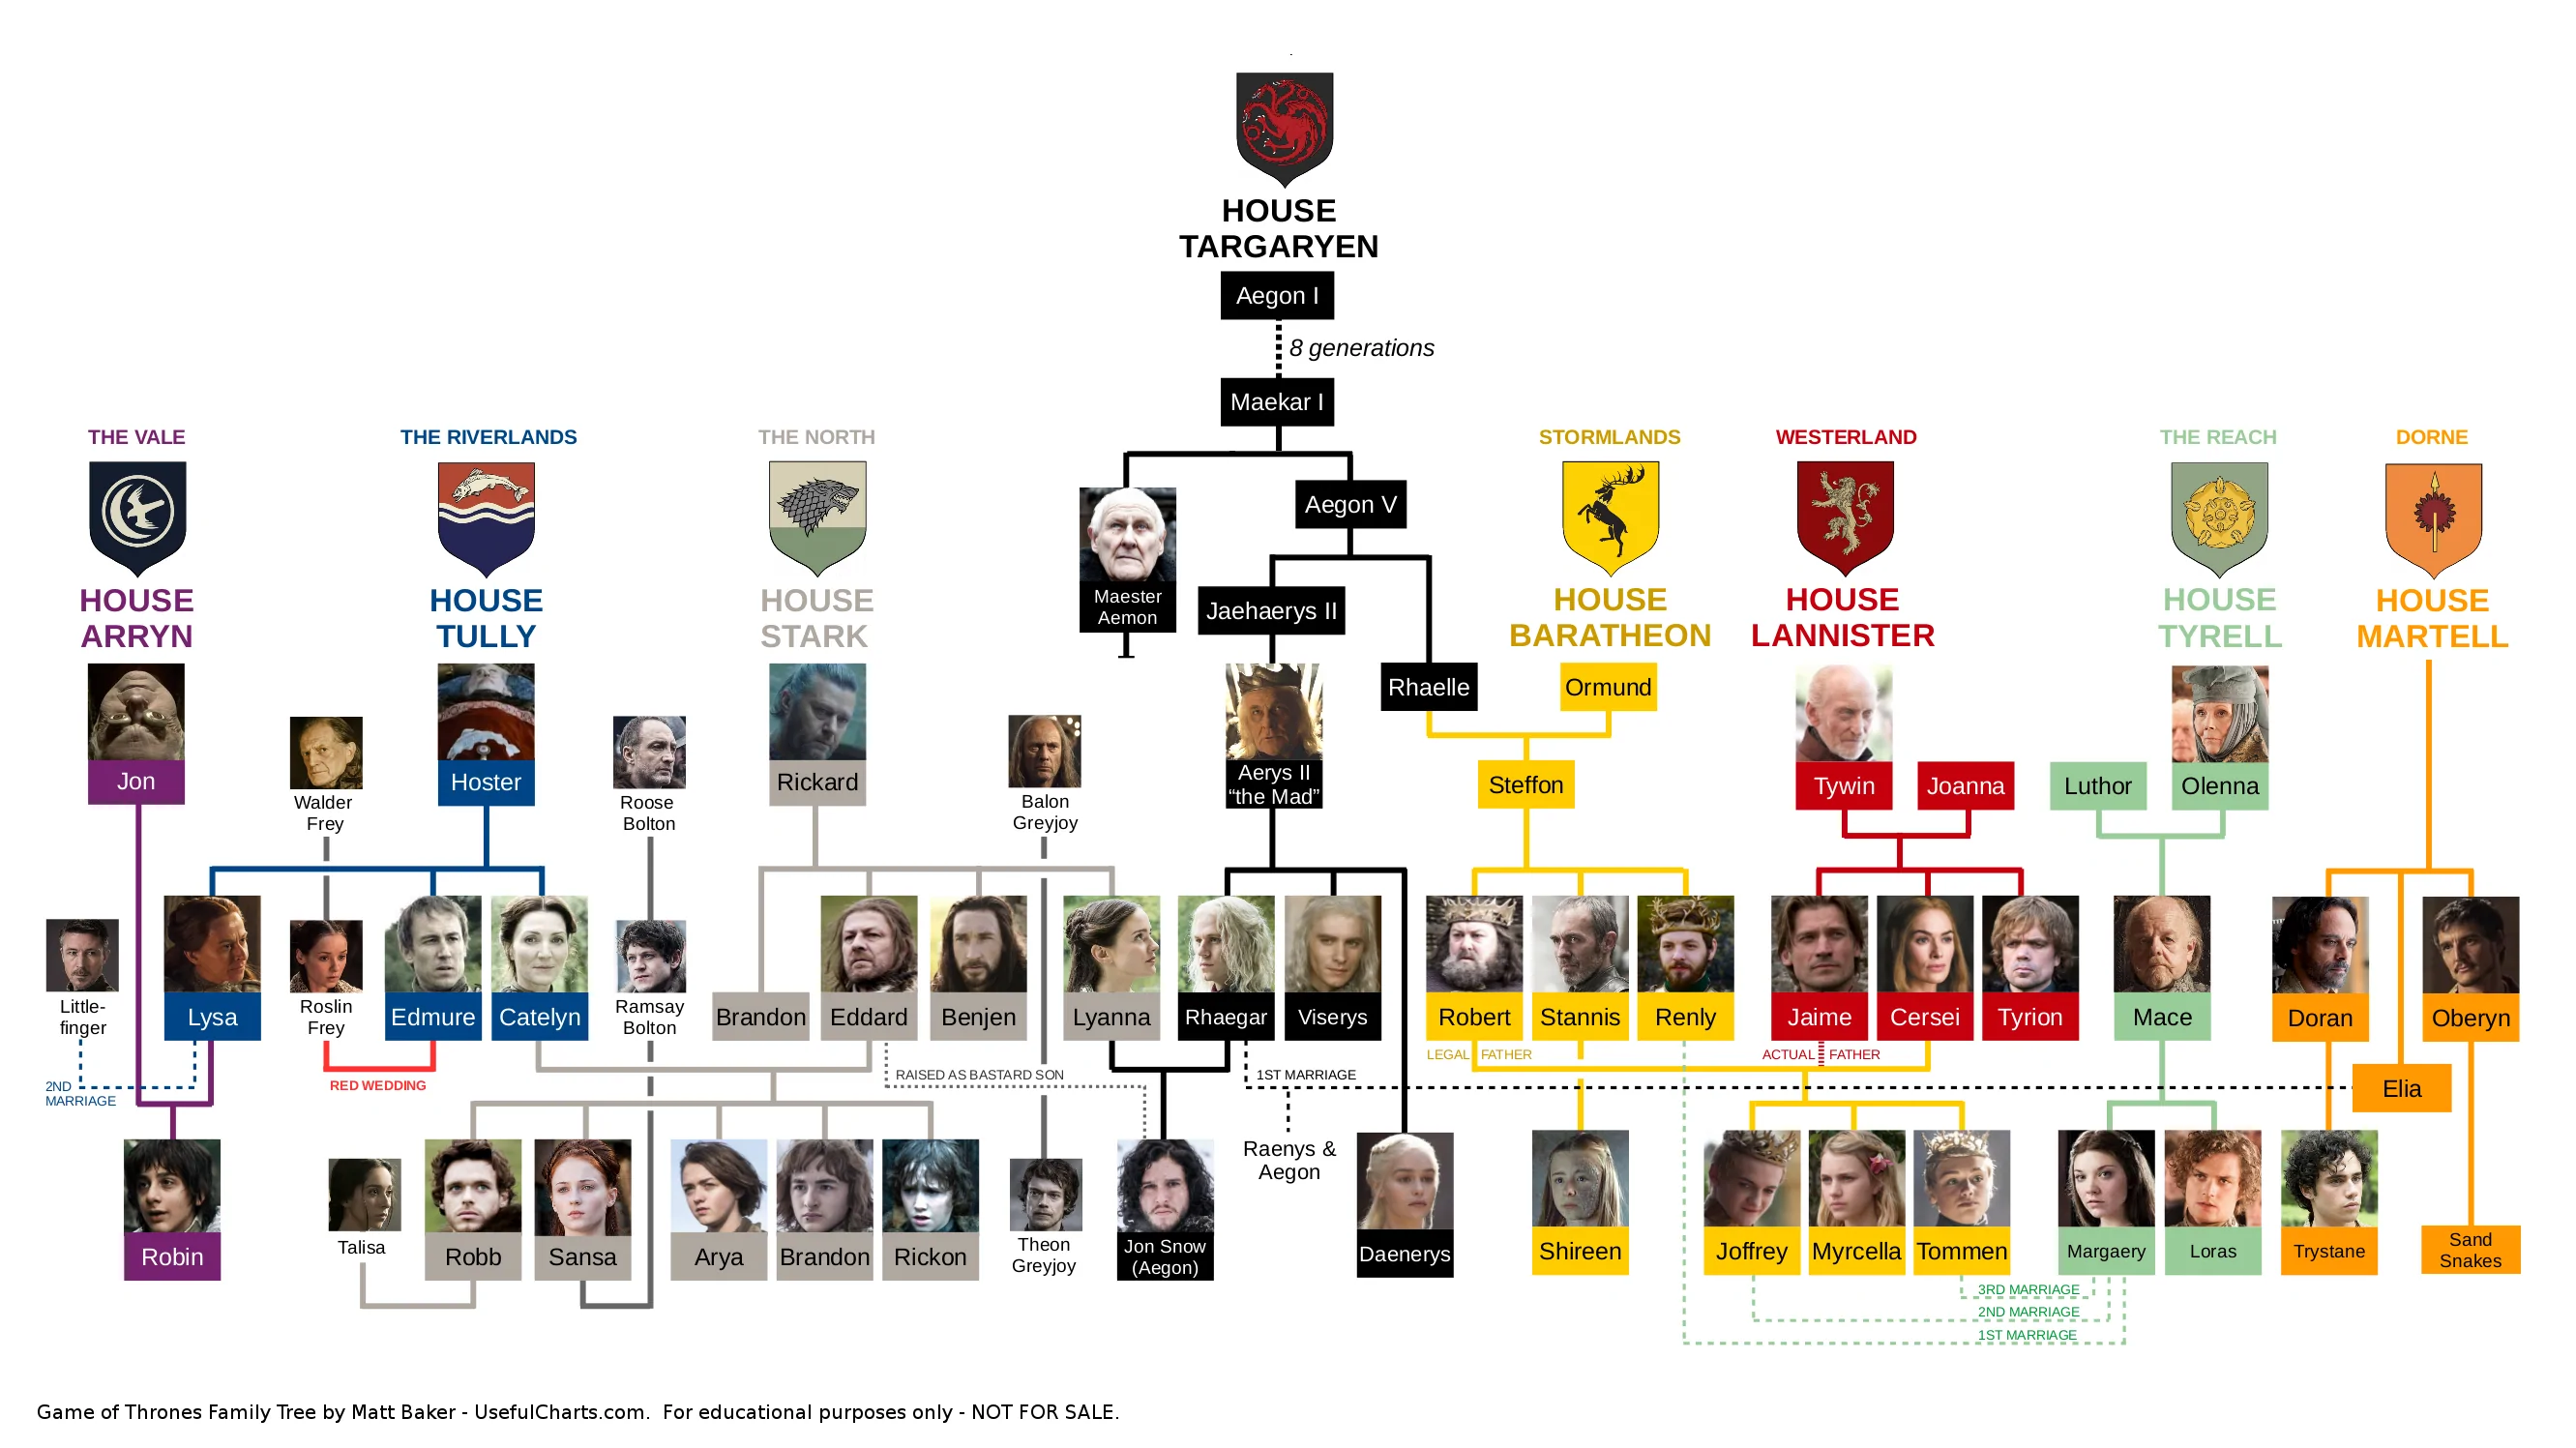

In [13]:
from IPython.display import Image
Image(filename='game-of-thrones-family-tree-season-7_3350358d-a69c-432c-a2d7-60c364913281.png') 

In [14]:
model.wv.most_similar('daenerys')

[('stormborn', 0.8370152711868286),
 ('unburnt', 0.7844223976135254),
 ('targaryen', 0.7543919682502747),
 ('queen', 0.7248197197914124),
 ('princess', 0.7240016460418701),
 ('viserys', 0.6767913699150085),
 ('myrcella', 0.6733529567718506),
 ('elia', 0.672318160533905),
 ('rhaella', 0.6607646942138672),
 ('dorne', 0.6522606611251831)]

In [15]:

model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [16]:

model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [17]:

model.wv['king']

array([ 1.8853424e+00,  5.9932649e-01,  1.3506689e+00, -9.4506121e-01,
       -5.0006437e-01,  7.0734072e-01,  1.8871235e+00,  4.0421267e+00,
       -3.5641441e-01,  3.5368271e+00,  2.1040587e-01, -2.0051584e+00,
        1.9937038e-01, -1.8870932e-01,  9.9444985e-03, -1.7103772e+00,
        2.7919582e-01, -7.8437805e-01, -1.3064427e+00, -3.7631090e+00,
        9.3662046e-02, -8.1121755e-01, -9.4821948e-01,  1.5727164e-01,
       -8.8269842e-01, -2.8856401e+00, -1.4827987e+00, -2.5616620e+00,
        1.3732207e-01,  2.2424438e+00,  2.5343496e-01, -5.4350972e-01,
       -3.7947658e-03, -2.6961497e-03,  1.0994772e+00,  3.0746862e-01,
       -2.7460740e+00, -3.3089787e-01, -1.1547660e+00, -9.6861982e-01,
       -1.2588400e+00,  6.4785343e-01,  1.9734434e+00,  1.3709904e+00,
       -1.5114521e+00, -8.1462109e-01,  2.4492319e+00, -1.6622935e-01,
        2.8516619e+00, -1.7144827e+00,  2.5594733e+00,  2.6323125e-01,
       -1.5962325e+00,  9.0108538e-01, -1.8743596e+00,  2.2746871e+00,
      

In [18]:
model.wv.most_similar(model.wv['king'] - model.wv['man'] + model.wv['woman'])

[('king', 0.7744580507278442),
 ('kingís', 0.674432098865509),
 ('queen', 0.6741920113563538),
 ('prince', 0.6406240463256836),
 ('targaryen', 0.6346994638442993),
 ('princess', 0.613330602645874),
 ('baratheon', 0.6112534403800964),
 ('murdered', 0.609980046749115),
 ('elia', 0.5963455438613892),
 ('myrcella', 0.5931929349899292)]

In [19]:
model.wv.similarity('arya','sansa')

0.8534218

In [20]:
model.wv.similarity('cersei','sansa')

0.7375998

In [21]:
model.wv.similarity('tywin','sansa')

0.20397927

In [22]:
y = model.wv.index_to_key
y[:10]

['the', 'and', 'to', 'of', 'he', 'his', 'was', 'you', 'her', 'in']

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=3)

In [25]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [26]:
X.shape

(19185, 3)

In [28]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()